In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=df.iloc[:,3:]

In [9]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


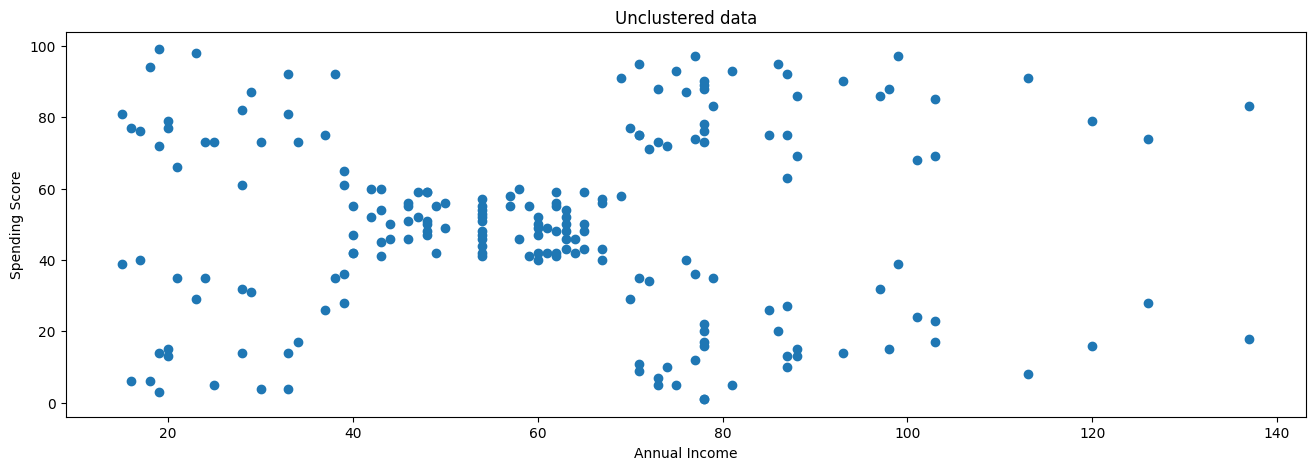

In [11]:
plt.figure(figsize=(16,5))
plt.title("Unclustered data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

In [17]:
from sklearn.cluster import KMeans,AgglomerativeClustering


In [18]:
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [19]:
sse

[269981.28,
 186195.07171089778,
 106348.37306211119,
 73679.78903948837,
 67617.6772178305,
 37271.8862365895,
 36667.796817765564,
 29032.75552567587,
 23785.35848880222,
 21091.206627473126,
 19183.884076340328,
 17099.854027174373,
 15258.60373217347,
 13259.693009768009,
 13100.948621904412]

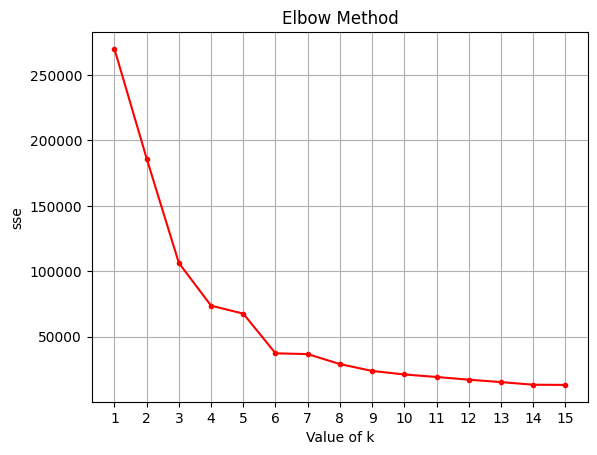

In [23]:
plt.title("Elbow Method")
plt.xlabel("Value of k")
plt.ylabel("sse")
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker=".",color="red")


In [25]:
from sklearn.metrics import silhouette_score


In [27]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)

In [29]:
silh

[0.39564531743995546,
 0.46761358158775435,
 0.4931963109249047,
 0.5532176107575425,
 0.456371316679934,
 0.45462869756741453,
 0.4524920580538445,
 0.4569479922714121,
 0.4451054968508613,
 0.4294131279624443,
 0.4292059037176928,
 0.4225323782534776,
 0.4300445133247672,
 0.4104306299079449]

<BarContainer object of 14 artists>

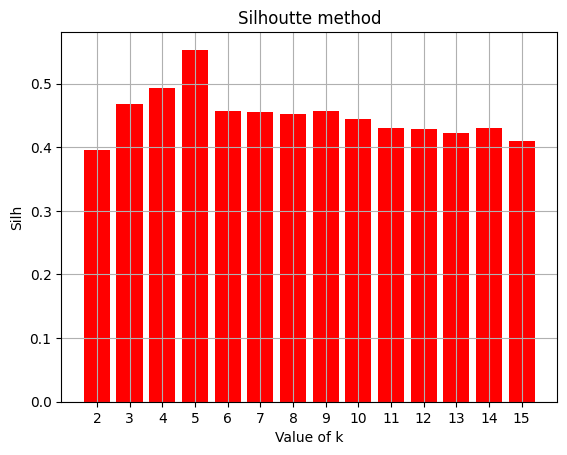

In [31]:
plt.title("Silhoutte method")
plt.xlabel("Value of k")
plt.ylabel("Silh")
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color="red")

In [33]:
km=KMeans(n_clusters=5,random_state=0)

In [35]:
labels=km.fit_predict(x)

In [37]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [39]:
cent=km.cluster_centers_
cent

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

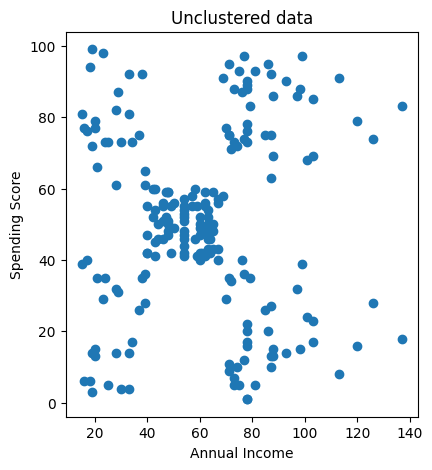

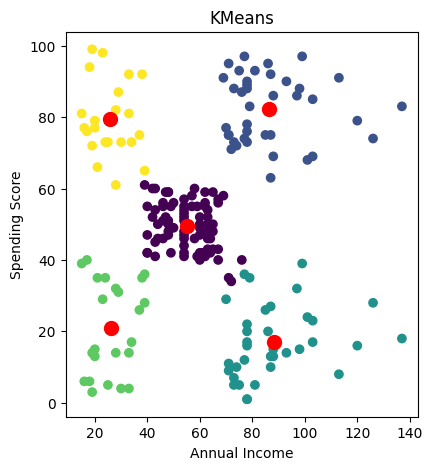

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Unclustered data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels)

plt.scatter(cent[:,0],cent[:,1],s=100,color="red")